## Violinplot

Very similar to BoxPlot but doesn't have **box_colours** and **add_stats** is False by default.

Parameters:  

    df: pd.DataFrame,
    x: object, 
    y: object, 
    title='', 
    xlabel='', 
    ylabel='', 
    hue=None, 
    order=None, 
    hue_order=None, 
    showfliers=False, 
    add_dots=False, 
    add_stats=False,
    stat_method='Mann-Whitney',  # options: t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal from: https://www.statsmodels.org/stable/api.html
    box_pairs=None, 
    figsize=(3, 3), 
    title_font_size=12, 
    label_font_size=8, 
    title_font_weight=700):

    

Config options = any of the parameters with the same name but with in a dictionary format instead, and also includes default parameters for the visualisation such as the font family and font.

Example config:
```
config={'palette': ['red', 'yellow', 'pink'], 
       'figsize':(4, 5),  # Size of figure (x, y)
        'title_font_size': 16, # Size of the title (pt)
        'label_font_size': 12, # Size of the labels (pt)
        'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
        'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
        'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
}
```

## Loading data

In [1]:
import pandas as pd
from sciviso import Barchart, Boxplot, Heatmap, Histogram, Scatterplot, Violinplot, Volcanoplot, Line
import matplotlib.pyplot as plt

df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Basic Violinplot

No handles with labels found to put in legend.


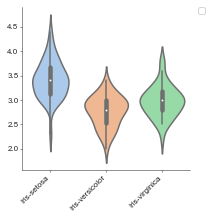

In [2]:
violinplot = Violinplot(df, x='label', y='sepal_width')
violinplot.plot()
plt.show()

No handles with labels found to put in legend.


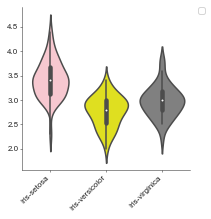

In [20]:
# change the colours by setting the palette in the config
violinplot = Violinplot(df, x='label', y='sepal_width', config={'palette':['pink', 'yellow', 'grey']})
violinplot.plot()
plt.show()

# Formatting data for violinplot

Data needs to be formamted for the violinplot, for example, if we have a gene list and want to do a boxplot of just a few of them or some groups of genes (e.g. a group of genes we're interested in comparing between two conditions).  

For this we'll use a different example dataset.

In [10]:
df = pd.read_csv('volcano.csv')
df

,external_gene_name,logfc,padj
0,MT-TF,-2.6,0.02128
1,MT-RNR1,-6.1,0.83880
2,MT-TV,-8.6,0.25140
3,MT-RNR2,-0.9,0.29380
4,MT-TL1,1.1,0.58210
...,...,...,...
73620,ARHGEF5,6.5,0.55980
73621,NOBOX,1.5,0.01870
73622,AC004864.1,-8.5,0.05760
73623,MTRF1LP2,-4.8,0.17570


No handles with labels found to put in legend.


    Samples  Values Conditions
0    cond_1     0.0     cond_1
1    cond_2    -2.0     cond_2
2    cond_1    -1.8     cond_1
3    cond_2    -3.8     cond_2
4    cond_1    -6.9     cond_1
..      ...     ...        ...
125  cond_2    -2.4     cond_2
126  cond_1     7.0     cond_1
127  cond_2     5.0     cond_2
128  cond_1    -7.7     cond_1
129  cond_2    -9.7     cond_2

[130 rows x 3 columns]


<AxesSubplot:>

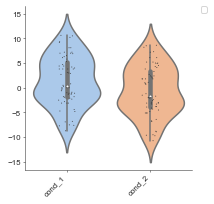

In [11]:
# Now we'll do an example where we look at the logFC between two conditions
# of a group of genes and test whether they are significantly different.

# Pretend we have two conditions
df['cond_1'] = df['logfc'] + 1
df['cond_2'] = df['logfc'] - 1

# We use boxplot to format the data since it is implemented there already
boxplot = Boxplot(df, x='external_gene_name', y='logfc')
hox_genes = [g for g in df['external_gene_name'].values if 'HOX' in g]
# conditions: list, filter_column=None, filter_values=None
formatted_df = boxplot.format_data_for_boxplot(
                   df, 
                   conditions=["cond_1", "cond_2"], 
                   filter_column="external_gene_name",
                   filter_values=hox_genes
                )
print(formatted_df)

# Reinitialise violinplot with the new data
violinplot = Violinplot(formatted_df, "Conditions", "Values", 
                  add_dots=True)
violinplot.plot()

## Advanced sytle options

Here are some examples where advanced style options are set.

No handles with labels found to put in legend.


p-value annotation legend:
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cond_1 v.s. cond_2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.169e-02 U_stat=2.606e+03


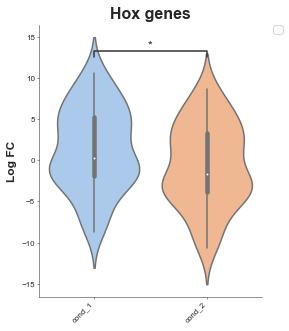

In [12]:
# violinplot = Violinplot(df: pd.DataFrame, x: object, y: object, title='', xlabel='', ylabel='', box_colors=None,
#                 hue=None, order=None, hue_order=None, showfliers=False, add_dots=False, add_stats=True,
#                 stat_method='Mann-Whitney', box_pairs=None, figsize=(3, 3), title_font_size=12, label_font_size=8, title_font_weight=700)# Config options = any of the parameters with the same name but with in a dictionary format instead

# Let's continue with the previous example with the formatted data

violinplot = Violinplot(df=formatted_df, x='Conditions', y='Values', title='Hox genes', xlabel='', ylabel='Log FC', 
                  hue=None, # A column in your dataset that you want to colour by
                  order=None, # Order of the box's
                  hue_order=None, # order of the colours
                  showfliers=False, # Show fliers (on the box's)
                  add_dots=False,  # Add dots for each data point
                  add_stats=True, # Add statistics between box's pairwise tests
                  stat_method='Mann-Whitney', # Type of stat
                  box_pairs=None, # Pre-specified comparisons (if you don't want to do all pairs)
                  figsize=(3, 3), 
                  title_font_size=12, 
                  label_font_size=8, 
                  title_font_weight=700, # Config options = any of the parameters with the same name but with in a dictionary format instead
                  # You could also pass these as individual parameters, but it's easier to set as a dictionary
                  # also, then you can re-use it for other charts!
                  config={'figsize':(4, 5),  # Size of figure (x, y)
                       'title_font_size': 16, # Size of the title (pt)
                       'label_font_size': 12, # Size of the labels (pt)
                       'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
                       'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
                       'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
                  })
violinplot.plot()
plt.show()

## Show multiple comparisons

In this one we have an example where we have two conditions for two groups of genes.

p-value annotation legend:
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cond_1 v.s. cond_2: t-test independent samples with Bonferroni correction, P_val=1.843e-13 stat=7.417e+00


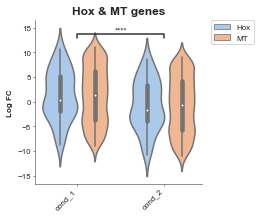

In [14]:
# Pretend we have two conditions
df['cond_1'] = df['logfc'] + 1
df['cond_2'] = df['logfc'] - 1

boxplot = Boxplot(df, x='external_gene_name', y='logfc')
mt_genes = [g for g in df['external_gene_name'].values if 'MT' in g]
hox_genes = [g for g in df['external_gene_name'].values if 'HOX' in g]
# conditions: list, filter_column=None, filter_values=None
hox_df = boxplot.format_data_for_boxplot(
                   df, 
                   conditions=["cond_1", "cond_2"], 
                   filter_column="external_gene_name",
                   filter_values=hox_genes)

# Add another column to the hox df that's the label
hox_df['Gene Group'] = 'Hox'

# Create a df for the MT genes
mt_df = boxplot.format_data_for_boxplot(
                   df, 
                   conditions=["cond_1", "cond_2"], 
                   filter_column="external_gene_name",
                   filter_values=mt_genes)

# Add another column to the hox df that's the label
mt_df['Gene Group'] = 'MT'

gene_df = pd.concat([hox_df, mt_df])

# Now we set hue
violinplot = Violinplot(df=gene_df, x='Conditions', y='Values', title='Hox & MT genes', xlabel='', ylabel='Log FC', 
                  hue='Gene Group', # A column in your dataset that you want to colour by
                  order=None, # Order of the box's
                  hue_order=None, # order of the colours
                  showfliers=False, # Show fliers (on the box's)
                  add_dots=False,  # Add dots for each data point
                  add_stats=True, # Add statistics between box's pairwise tests
                  stat_method='t-test_ind', # Type of stat
                  box_pairs=None, # Pre-specified comparisons (if you don't want to do all pairs)
                  figsize=(3, 3), 
                  title_font_size=12, 
                  label_font_size=8, 
                  title_font_weight=700) # Config options = any of the parameters with the same name but with in a dictionary format instead)
violinplot.plot()
plt.show()

## Another example

p-value annotation legend:
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cond_1Hox v.s. cond_1MT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.699e+04
cond_1MT v.s. cond_2Hox: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.865e-02 U_stat=3.216e+04
cond_2Hox v.s. cond_2MT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.699e+04
cond_1Hox v.s. cond_2Hox: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.301e-01 U_stat=2.606e+03
cond_1MT v.s. cond_2MT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.349e-11 U_stat=4.106e+05
cond_1Hox v.s. cond_2MT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.067e-02 U_stat=3.214e+04


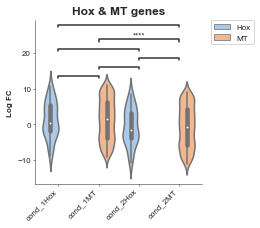

p-value annotation legend:
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cond_1Hox v.s. cond_2Hox: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.338e-02 U_stat=2.606e+03
cond_1MT v.s. cond_2MT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.450e-11 U_stat=4.106e+05


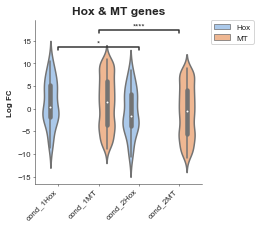

In [17]:
# Pretend we have two conditions and two groups of genes we want to identify the significance between
df['cond_1'] = df['logfc'] + 1
df['cond_2'] = df['logfc'] - 1

boxplot = Boxplot(df, x='external_gene_name', y='logfc')
mt_genes = [g for g in df['external_gene_name'].values if 'MT' in g]
hox_genes = [g for g in df['external_gene_name'].values if 'HOX' in g]
# conditions: list, filter_column=None, filter_values=None
hox_df = boxplot.format_data_for_boxplot(
                   df, 
                   conditions=["cond_1", "cond_2"], 
                   filter_column="external_gene_name",
                   filter_values=hox_genes)

# Add another column to the hox df that's the label
hox_df['Gene Group'] = 'Hox'
hox_df['Conditions'] = hox_df['Conditions'].values + hox_df['Gene Group'].values

# Create a df for the MT genes
mt_df = boxplot.format_data_for_boxplot(
                   df, 
                   conditions=["cond_1", "cond_2"], 
                   filter_column="external_gene_name",
                   filter_values=mt_genes)

# Add another column to the hox df that's the label
mt_df['Gene Group'] = 'MT'
mt_df['Conditions'] = mt_df['Conditions'].values + mt_df['Gene Group'].values

gene_df = pd.concat([hox_df, mt_df])

#
violinplot = Violinplot(df=gene_df, x='Conditions', y='Values', title='Hox & MT genes', xlabel='', ylabel='Log FC', 
                  hue='Gene Group', add_stats=True) # A column in your dataset that you want to colour by) # Config options = any of the parameters with the same name but with in a dictionary format instead)
violinplot.plot()
plt.show()
                  
# Let's limit our tests to only the comparisons between things we're interested in
violinplot = Violinplot(df=gene_df, x='Conditions', y='Values', title='Hox & MT genes', xlabel='', ylabel='Log FC', 
                  hue='Gene Group',
                  add_stats=True,
                  box_pairs=[('cond_1Hox', 'cond_2Hox'), 
                             ('cond_1MT', 'cond_2MT'), 
                            ]) 
violinplot.plot()
plt.show()


## Saving

Saving is the same for all plots and v simple, just make sure you specify what ending you want it to have.

No handles with labels found to put in legend.


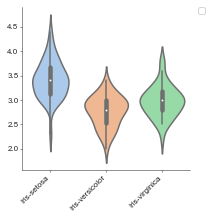

In [18]:
df = pd.read_csv('iris.csv')
violinplot = Violinplot(df, x='label', y='sepal_width')
violinplot.plot()
plt.savefig('chart.svg') # .png, .pdf, .jpg
plt.savefig('chart.png', dpi=300) # .png, .pdf, .jpg
plt.savefig('chart.pdf') # .png, .pdf, .jpg